# **Actividad: Problemas de regresión**

Héctor Manuel Cárdenas Yáñez - A01634615

In [ ]:
# Importar Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets, linear_model, tree
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, train_test_split
from sklearn.linear_model import LassoCV, Lasso
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, r_regression, SequentialFeatureSelector, RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
# Cargar el conjunto de datos desde el archivo CSV
df_crime = pd.read_csv('/content/crime_data.csv')
#df_crime.head()

df_life_exp = pd.read_csv('/content/life_expectancy_data.csv')
df_life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# **Ejercicio 1**

1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

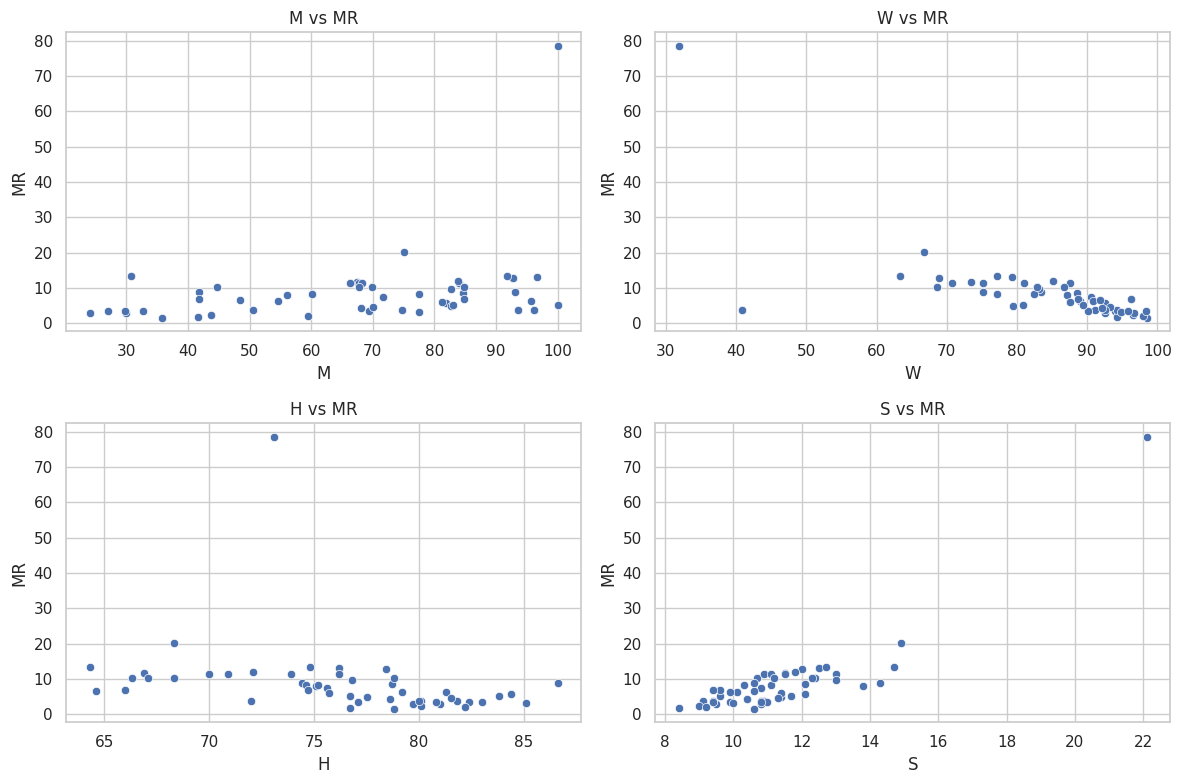

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Graficar M vs MR
sns.scatterplot(data=df_crime, x='M', y='MR', ax=axes[0, 0])
axes[0, 0].set_title('M vs MR')

# Graficar W vs MR
sns.scatterplot(data=df_crime, x='W', y='MR', ax=axes[0, 1])
axes[0, 1].set_title('W vs MR')

# Graficar H vs MR
sns.scatterplot(data=df_crime, x='H', y='MR', ax=axes[1, 0])
axes[1, 0].set_title('H vs MR')

# Graficar S vs MR
sns.scatterplot(data=df_crime, x='S', y='MR', ax=axes[1, 1])
axes[1, 1].set_title('S vs MR')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

2. Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.

In [ ]:
def fit_model(X, y):
  return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
# Predict function (it evaluates an array of observations using the specified linear model).
def predict(X, beta):
  return X @ beta

# Definir variables predictoras y de respuesta
x = np.array(df_crime[['M', 'W', 'H', 'S']])  # Variables predictoras
y = np.array(df_crime['MR'])  # Variable de respuesta

# Añadimos columna de 1's al DataFrame
X = np.column_stack((np.ones(x.shape[0]), x))

# Build linear model
beta = fit_model(X, y)
print ("Model coefficients: ", beta)
# Evaluate residuals
y_pred = predict(X, beta)
r = y - y_pred

Model coefficients:  [-9.47235284  0.03215936 -0.16912874 -0.12137218  3.48850667]


3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.

In [ ]:
# Calculate MSE, MAE and R^2 with the training set

# Evaluate linear regression model using k-fold cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  regr_cv = linear_model.LinearRegression()
  regr_cv.fit(x_train, y_train)
  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]
  y_pred = regr_cv.predict(x_test)
  # Calculate MSE, MAE and R^2
  mse_i = mean_squared_error(y_test, y_pred)
  print('mse = ', mse_i)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  print('mae = ', mae_i)
  mae_cv.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  print('r^2= ', r2_i)
  r2_cv.append(r2_i)
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
np.average(r2_cv))

mse =  47.219123377880784
mae =  4.962376878453156
r^2=  -2.678354146530938
mse =  257.5256934038027
mae =  6.553032423863956
r^2=  0.4383286559601284
mse =  11.668047066986336
mae =  2.988110180041161
r^2=  0.5067220030782682
mse =  30.043126694488926
mae =  4.953244684382293
r^2=  -0.9345718302138448
mse =  15.480113799819609
mae =  3.1405947900751663
r^2=  -0.784883233960914
MSE: 72.38722086859568  MAE: 4.519471791363147  R^2: -0.6905517103334601


4. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R2 (sólo si es el método de Monte Carlo), MSE y MAE.

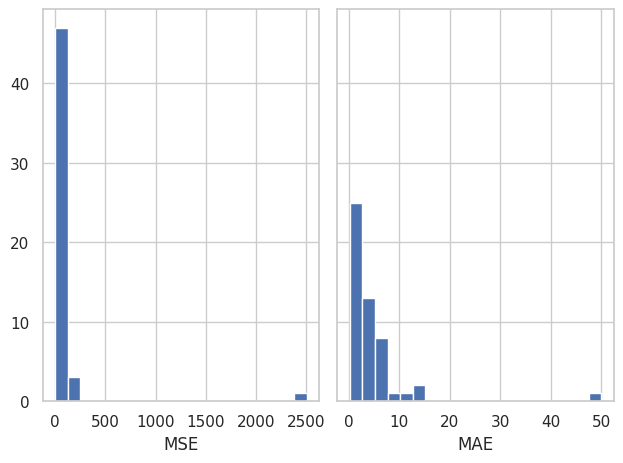

In [ ]:
# Find histograms of MSE and MAE using LOOCV

# Evaluate linear regression model using k-fold cross-validation
kf = LeaveOneOut()

mse_cv = []
mae_cv = []
for train_index, test_index in kf.split(x):
  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  regr_cv = linear_model.LinearRegression()
  regr_cv.fit(x_train, y_train)
  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]
  y_pred = regr_cv.predict(x_test)
  # Calculate MSE and MAE
  mse_i = mean_squared_error(y_test, y_pred)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  mae_cv.append(mae_i)
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(mse_cv, bins=20)
axs[0].set_xlabel("MSE")
axs[1].hist(mae_cv, bins=20)
axs[1].set_xlabel("MAE")
plt.show()

5. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

In [ ]:
# Agregar columnas de cuadrados y productos
# Nota: Sólo consideré uno de los productos iguales. MxW = WxM: Sólo se considero MxW
df_crime['M2'] = df_crime['M'] ** 2
df_crime['W2'] = df_crime['W'] ** 2
df_crime['H2'] = df_crime['H'] ** 2
df_crime['S2'] = df_crime['S'] ** 2

df_crime['MxW'] = df_crime['M'] * df_crime['W']
df_crime['MxH'] = df_crime['M'] * df_crime['H']
df_crime['MxS'] = df_crime['M'] * df_crime['S']

df_crime['WxH'] = df_crime['W'] * df_crime['H']
df_crime['WxS'] = df_crime['W'] * df_crime['S']

df_crime['HxS'] = df_crime['H'] * df_crime['S']

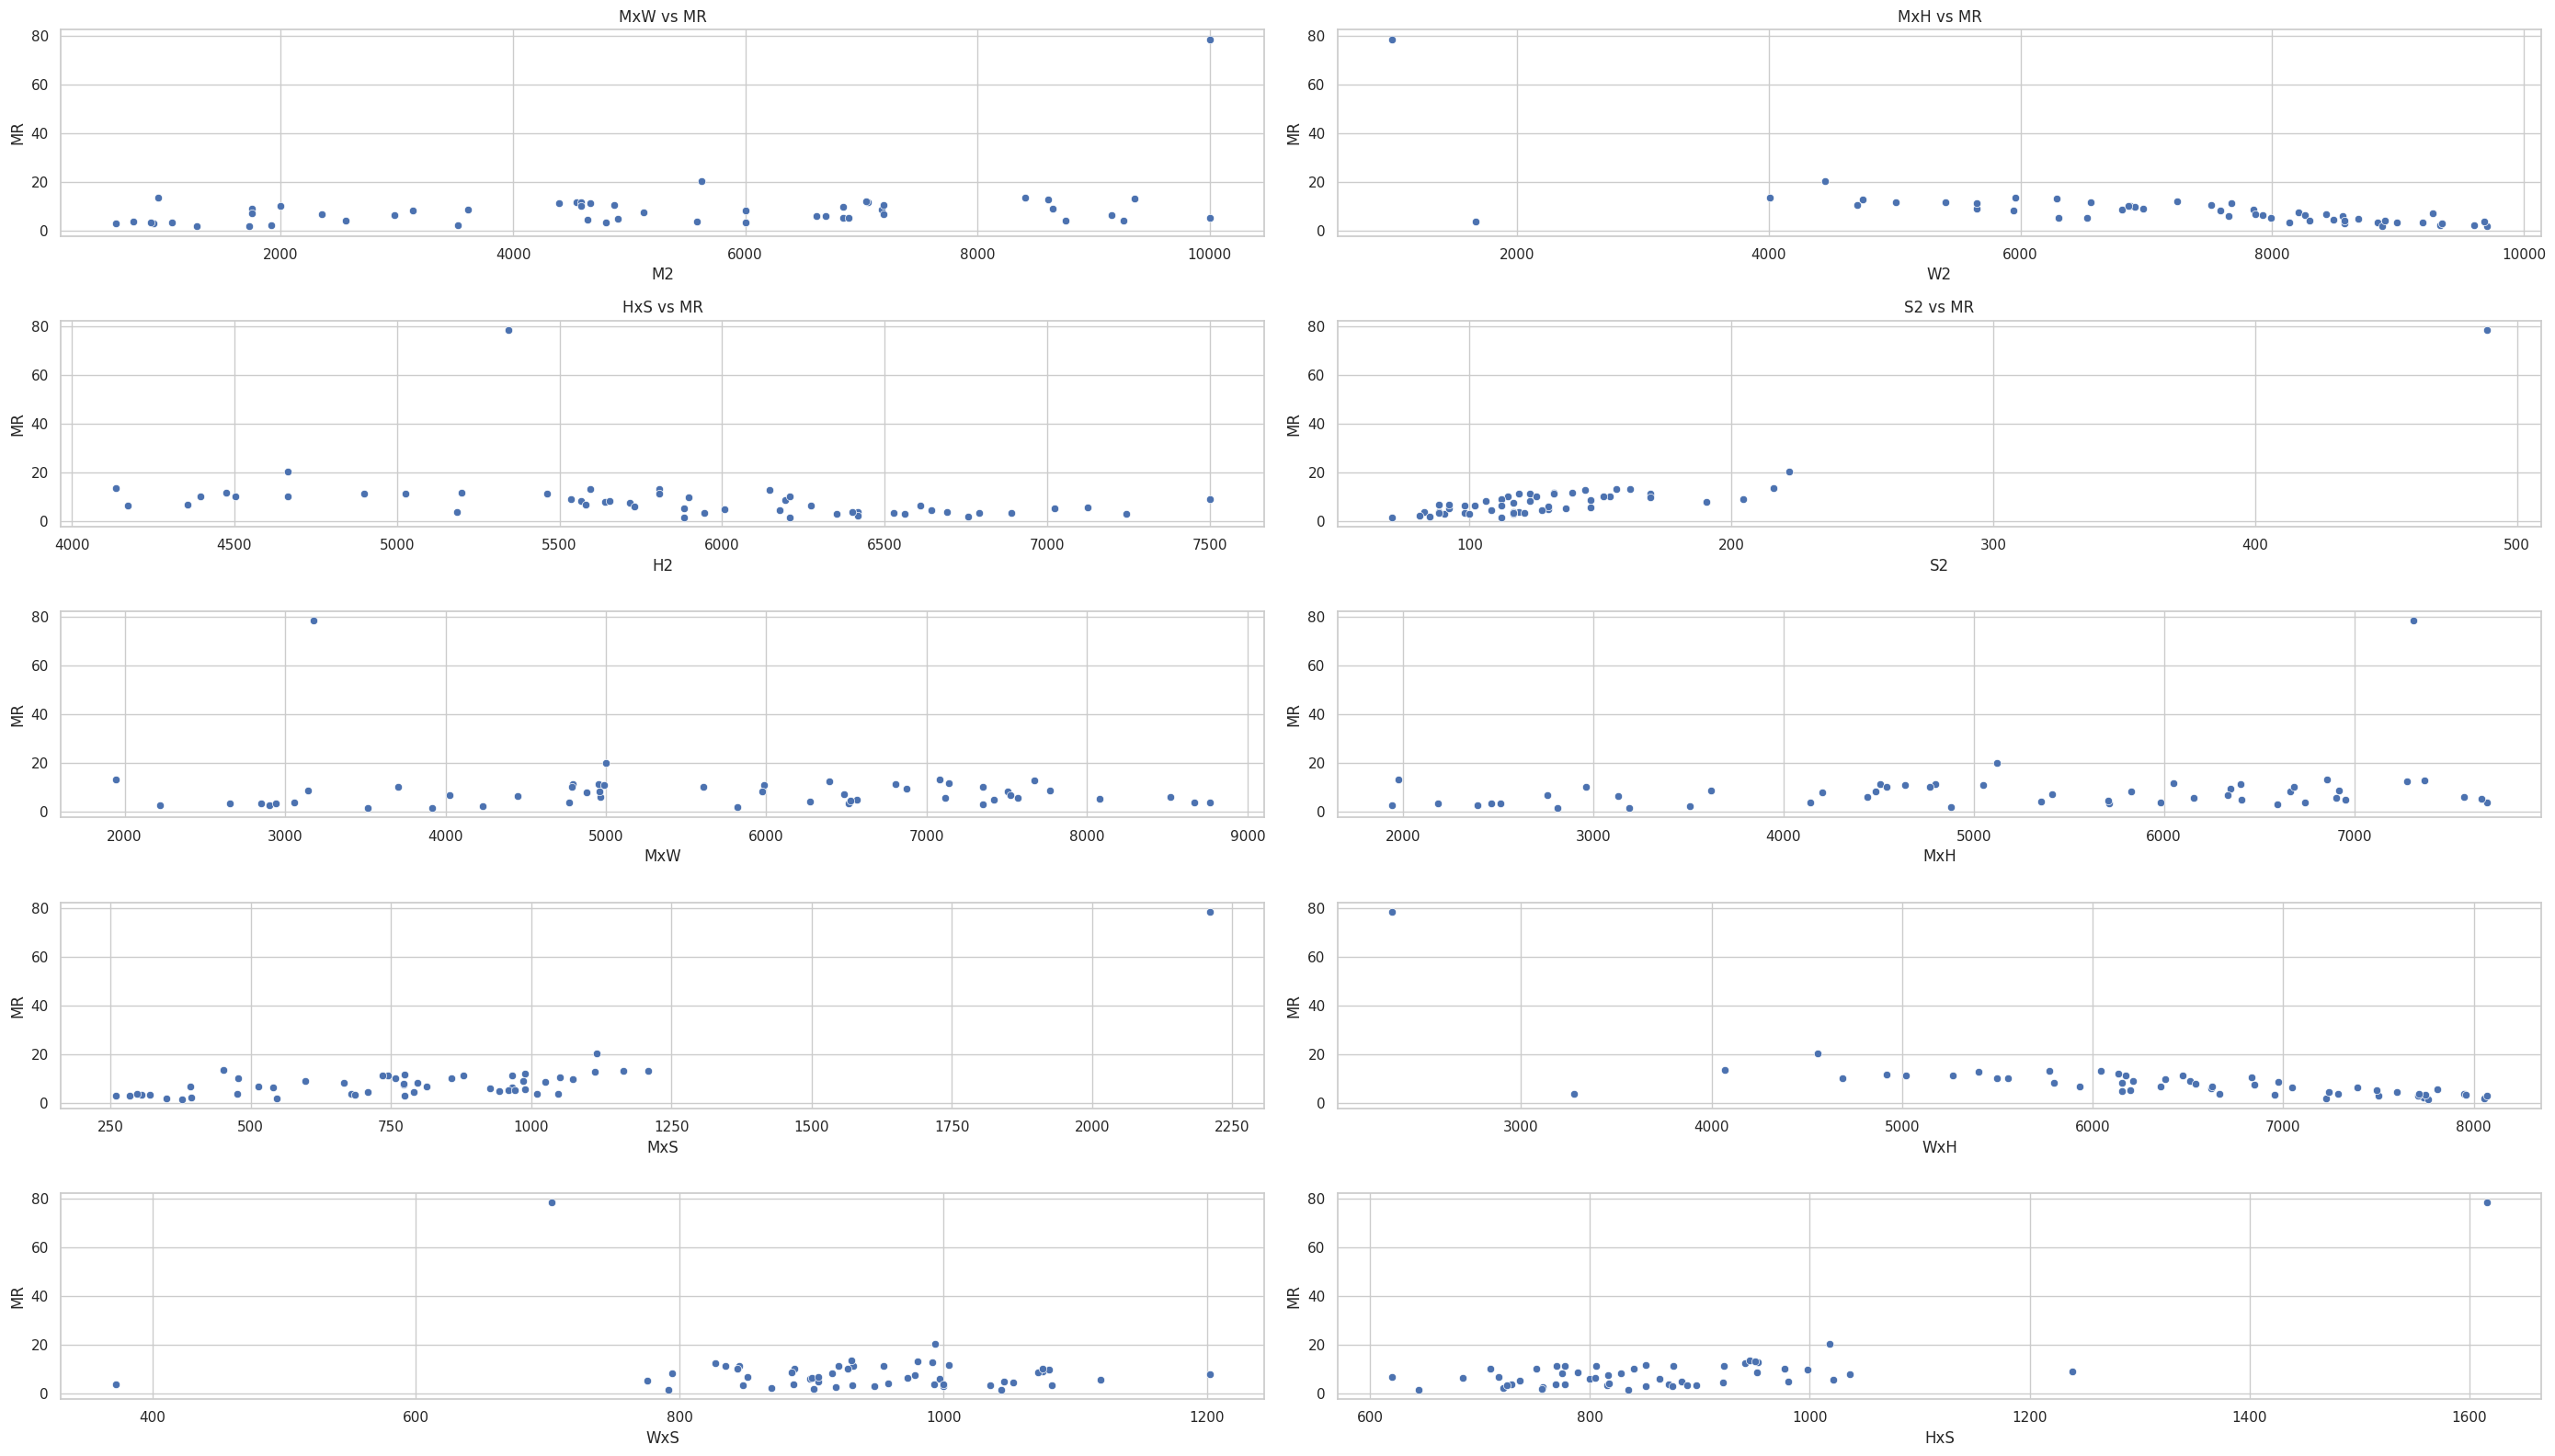

In [ ]:
# Parte 1:

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(28, 16))
plt.subplots_adjust(hspace=0.5)

# Graficar M2 vs MR
sns.scatterplot(data=df_crime, x='M2', y='MR', ax=axes[0, 0])
axes[0, 0].set_title('M2 vs MR')

# Graficar W2 vs MR
sns.scatterplot(data=df_crime, x='W2', y='MR', ax=axes[0, 1])
axes[0, 1].set_title('W2 vs MR')

# Graficar H2 vs MR
sns.scatterplot(data=df_crime, x='H2', y='MR', ax=axes[1, 0])
axes[1, 0].set_title('H2 vs MR')

# Graficar S2 vs MR
sns.scatterplot(data=df_crime, x='S2', y='MR', ax=axes[1, 1])
axes[1, 1].set_title('S2 vs MR')

# Graficar MxW vs MR
sns.scatterplot(data=df_crime, x='MxW', y='MR', ax=axes[2, 0])
axes[0, 0].set_title('MxW vs MR')

# Graficar MxH vs MR
sns.scatterplot(data=df_crime, x='MxH', y='MR', ax=axes[2, 1])
axes[0, 1].set_title('MxH vs MR')

# Graficar MxS vs MR
sns.scatterplot(data=df_crime, x='MxS', y='MR', ax=axes[3, 0])
axes[1, 0].set_title('MxS vs MR')

# Graficar WxH vs MR
sns.scatterplot(data=df_crime, x='WxH', y='MR', ax=axes[3, 1])
axes[1, 0].set_title('WxH vs MR')

# Graficar WxS vs MR
sns.scatterplot(data=df_crime, x='WxS', y='MR', ax=axes[4, 0])
axes[1, 0].set_title('WxS vs MR')

# Graficar HxS vs MR
sns.scatterplot(data=df_crime, x='HxS', y='MR', ax=axes[4, 1])
axes[1, 0].set_title('HxS vs MR')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [ ]:
# Parte 2:

# Definir variables predictoras y de respuesta
x2 = np.array(df_crime[['M2', 'W2', 'H2', 'S2', 'MxW', 'MxH', 'MxS', 'WxH', 'WxS', 'HxS']])  # Variables predictoras
y2 = np.array(df_crime['MR'])  # Variable de respuesta

# Añadimos columna de 1's al DataFrame
X2 = np.column_stack((np.ones(x2.shape[0]), x2))

# Build linear model
beta2 = fit_model(X2, y2)
print ("Model coefficients: ", beta2)
# Evaluate residuals
y_pred2 = predict(X2, beta2)
r2 = y2 - y_pred2

Model coefficients:  [ 1.40020170e+01 -6.28475658e-04  9.06954553e-04 -1.17934518e-02
 -8.45746762e-03 -1.62502141e-03  7.61135116e-04  1.88054219e-02
  7.58645554e-03 -6.77623947e-02  7.71171363e-02]


In [ ]:
# Parte 3:

# Calculate MSE, MAE and R^2 with the training set
# Evaluate linear regression model using k-fold cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mse_cv2 = []
mae_cv2 = []
r2_cv2 = []
for train_index, test_index in kf.split(x):
  # Training phase
  x_train2 = x2[train_index, :]
  y_train2 = y2[train_index]
  regr_cv2 = linear_model.LinearRegression()
  regr_cv2.fit(x_train2, y_train2)
  # Test phase
  x_test2 = x2[test_index, :]
  y_test2 = y2[test_index]
  y_pred2 = regr_cv2.predict(x_test2)
  # Calculate MSE, MAE and R^2
  mse_i2 = mean_squared_error(y_test2, y_pred2)
  mse_cv2.append(mse_i2)
  mae_i2 = mean_absolute_error(y_test2, y_pred2)
  mae_cv2.append(mae_i2)
  r2_i2 = r2_score(y_test2, y_pred2)
  r2_cv2.append(r2_i2)
print('MSE:', np.average(mse_cv2), ' MAE:', np.average(mae_cv2),' R^2:',
np.average(r2_cv2))

MSE: 23.463605233662303  MAE: 2.2141964236247254  R^2: 0.6455902321844519


6. Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).

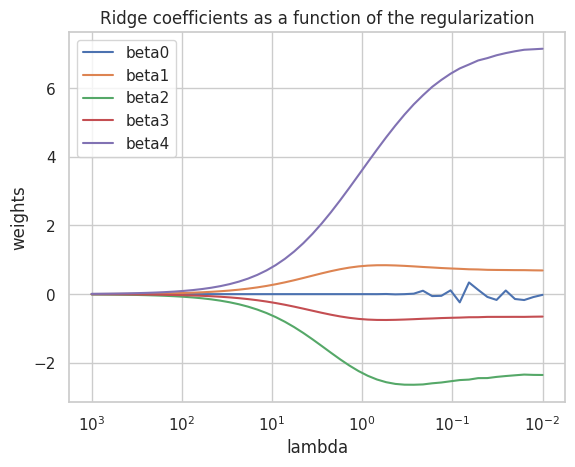

In [ ]:
# Error function (it evaluates the mean squared error function for the specified model and data set).
def mse(X, y, beta):
  y_pred = X @ beta
  return (y - y_pred).sum()
# Gradient of error function (it evaluates the gradient of the mean squared error function for the specified model and data set).
def grad(X, y, beta, lambd):
  n = len(y)
  y_pred = X @ beta
  res = y - y_pred
  tmp = res*X.transpose()
  return -(2/n)*tmp.sum(axis = 1) + 2*lambd*beta

def fit_modelRidge(x,y,lambd = 0.1, alpha = 0.0005, maxit = 10000):
  npredictors = x.shape[1]

  beta = 2 * np.random.rand(npredictors)-1.0

  it = 0
  while (np.linalg.norm(grad(x,y,beta,lambd)) > 1e-4) and (it < maxit):
    beta = beta - alpha*grad(x,y,beta,lambd)
    it = it + 1
  return beta

lambdas = np.logspace(-2,3,50)
coefs=[]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

for l in lambdas:
  betaR = fit_modelRidge(X_normalized, y, l)
  coefs.append(betaR)

axis = plt.gca()
lineObjects = axis.plot(lambdas, coefs)
axis.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

features = ['beta' + str(feat) for feat in range(coefs[0].shape[0])]
axis.legend(iter(lineObjects), features)

plt.show()

7. Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?

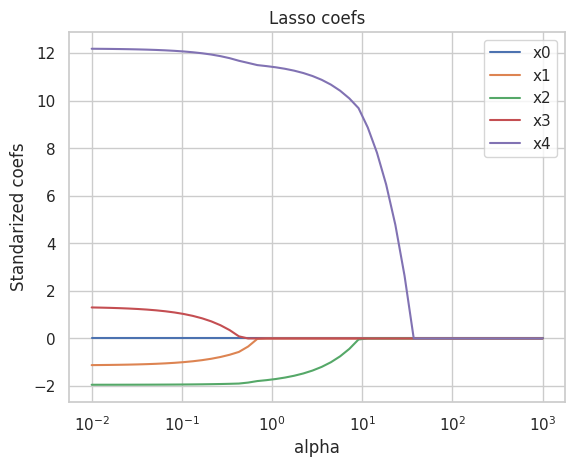

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.8,random_state=42)

alphas = np.logspace(-2, 3, 50)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()

lineObjects = ax.plot(alphas,coefs)
ax.set_xscale('log')
axis.set_xlim(axis.get_xlim()[::-1])
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standarized coefs')
plt.title('Lasso coefs')
features = ['x' + str(feat) for feat in range(coefs[0].shape[0])]
ax.legend(iter(lineObjects), features)
plt.show()

8. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

A. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?

No. El modelo de regresión lineal no es efectivo para este problema, los valores de los errores cuadrados y absolutos son considerables para considerarlo como un método viable. MSE: 80.36445389446095  MAE: 4.882594114777547

B. ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada?

Este método es aún menos efficientes para el modelo. Tan solo con analizar os resultados podemos ver que esta horrible: MSE: 74.10253524396816  MAE: 4.492215450934988  R^2: -0.6226813337650289 La R¨2 es negativa los errores aumentan más y la R¨2 también es negativa. Simlpemente no es un método funcional para manejar estos datos. Los cambios implementando el método de validación cruzada es mínimo.

C. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?

El cuadrático definitivamente. El análsis de los datos es mucho mejor, el error es mínimo, la desviación tampoco es grande y mantiene un mejor rendimiento que el modelo lineal

D. ¿Qué variables son más relevantes para el modelo según Ride y Lasso?

Analizando con el modelo de Ridge y Lasso y comparando las gráficas puedo deducir que las variables más relevantes son X1, X2, X3, y X4 porque son las únicas varibales cuyos valores no se acercan a 0, o cómo mínimo no lo suficiente para no ser los suficientemente relevantes como en el caso de X1

E. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?

Una obervacion interesante es que la implementación de reresión lineal normal mejoró muchísimo cuando se cambiaron los dtos a cuadráticos.

# **Ejercicio 2**

1. Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [ ]:
df_life_exp = df_life_exp.dropna()
df_life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Definir variables predictoras y de respuesta

x = np.array(df_life_exp[['infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling']])  # Variables predictoras
y = np.array(df_life_exp['Life expectancy '])  # Variable de respuesta


# Añadimos columna de 1's al DataFrame
X = np.column_stack((np.ones(x.shape[0]), x))

# Build linear model
beta = fit_model(X, y)
print ("Model coefficients: ", beta)
# Evaluate residuals
y_pred = predict(X, beta)
r = y - y_pred

# Evaluate model with cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):

  # Training phase
  x_train = x[train_index, :]
  y_train = y[train_index]
  beta_cv = fit_model(x_train, y_train)

  # Test phase
  x_test = x[test_index, :]
  y_test = y[test_index]
  y_pred = predict(x_test, beta_cv)

  # Calculate MSE, MAE and R^2
  mse_i = mean_squared_error(y_test, y_pred)
  print('mse = ', mse_i)
  mse_cv.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred)
  print('mae = ', mae_i)
  mae_cv.append(mae_i)
  r2_i = r2_score(y_test, y_pred)
  print('r^2= ', r2_i)
  r2_cv.append(r2_i)
print('MSE:', np.average(mse_cv), ' MAE:', np.average(mae_cv),' R^2:',
np.average(r2_cv))

Model coefficients:  [ 4.89547339e+01  1.32330938e-01 -3.72163049e-02  6.29794334e-04
 -7.73680342e-06  5.02615480e-02 -9.70074095e-02  8.27778674e-02
  2.28100434e-02 -6.15202335e-01 -2.32026290e-09  3.46116043e-03
 -1.20516189e-01  1.45012308e+00]
mse =  62.07496781975327
mae =  6.1694209415709
r^2=  0.1717166910846175
mse =  64.72952566660572
mae =  6.3422903602114165
r^2=  0.193455018586553
mse =  64.11744043305364
mae =  6.504183187084841
r^2=  0.16060807571316926
mse =  62.54596474328944
mae =  6.297381799095517
r^2=  0.15269983516006058
mse =  59.43435885588107
mae =  6.086056995063612
r^2=  0.26582527371857223
MSE: 62.58045150371663  MAE: 6.2798666566052574  R^2: 0.1888609788525945


2. Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

---- n features = 1
MSE: 36.439085129881775  MAE: 4.554373402308427  R^2: 0.5279587404095942
---- n features = 2
MSE: 34.418721564724294  MAE: 4.471563299197526  R^2: 0.5531268245822993
---- n features = 3
MSE: 33.6980704152037  MAE: 4.417180414160523  R^2: 0.5647478385592402
---- n features = 4
MSE: 32.86971986558957  MAE: 4.364191024987784  R^2: 0.5743914233031748
---- n features = 5
MSE: 32.19712613161458  MAE: 4.3130916535576915  R^2: 0.5826018547146783
---- n features = 6
MSE: 32.37770895141382  MAE: 4.334179104372588  R^2: 0.5772182119590742
---- n features = 7
MSE: 32.0993832368175  MAE: 4.310719421514599  R^2: 0.5828884390837563
---- n features = 8
MSE: 32.17652394919238  MAE: 4.307748659338142  R^2: 0.5833815025445401
---- n features = 9
MSE: 32.07319410112977  MAE: 4.308849784901226  R^2: 0.5838434778847723


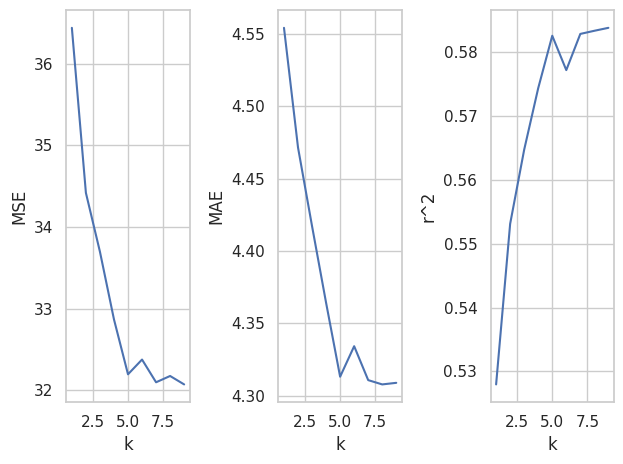

Número óptimo de características: 9
Características seleccionadas: [ 4 12]


In [ ]:
# Find optimal number of features using cross-validation
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
selected_features = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        fselection_cv = SelectKBest(score_func=r_regression, k=n_feat)
        x_train_selected = fselection_cv.fit_transform(x_train, y_train)

        # Get selected feature indices
        selected_indices = fselection_cv.get_support(indices=True)
        selected_features.append(selected_indices)

        regr_cv = linear_model.LinearRegression()
        regr_cv.fit(x_train_selected, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        x_test_selected = x_test[:, selected_indices]

        y_pred = regr_cv.predict(x_test_selected)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("k")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("k")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("k")
axs[2].set_ylabel("r^2")
plt.show()

# Mostrar las características seleccionadas para el número óptimo de características
optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_indices = selected_features[optimal_n_feat - 1]
print("Número óptimo de características:", optimal_n_feat)
print("Características seleccionadas:", optimal_selected_indices)

3. Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.

---- n features = 1
MSE: 36.57771797769702  MAE: 4.566794160791362  R^2: 0.5254542893619759
---- n features = 2
MSE: 21.0191945298349  MAE: 3.6189173685043285  R^2: 0.7276005270217576
---- n features = 3
MSE: 20.382737323318413  MAE: 3.565971779236225  R^2: 0.7344317323728033
---- n features = 4
MSE: 19.137511636227877  MAE: 3.4332725319455264  R^2: 0.7508281907742236
---- n features = 5
MSE: 18.61085513333331  MAE: 3.4035502814521927  R^2: 0.759232854735086
---- n features = 6
MSE: 18.628089250083818  MAE: 3.4021514782319544  R^2: 0.7572326952258115
---- n features = 7
MSE: 18.71364517267736  MAE: 3.413679188775845  R^2: 0.7555702712804637
---- n features = 8
MSE: 18.109624312280566  MAE: 3.355706061804878  R^2: 0.7657719664441508
---- n features = 9
MSE: 17.96749844563849  MAE: 3.362551009498511  R^2: 0.7676421789660999


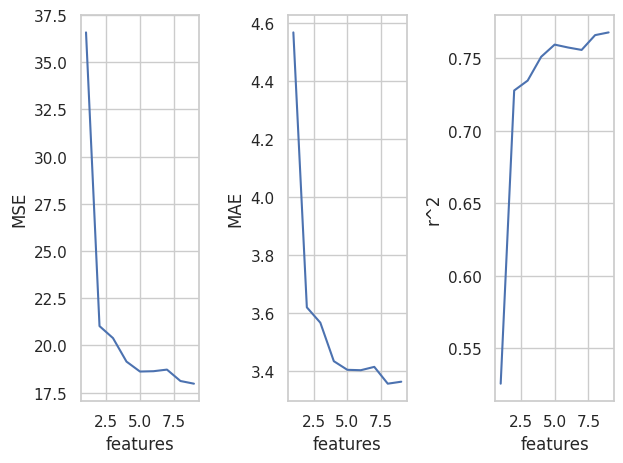

Número óptimo de características: 9
Características seleccionadas: [ 8 12]


In [ ]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []
selected_features = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    mse_cv = []
    mae_cv = []
    r2_cv = []
    kf = KFold(n_splits=5, shuffle=True)
    for train_index, test_index in kf.split(x):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        # Initialize the linear regression model
        regr_cv = linear_model.LinearRegression()

        # Initialize SequentialFeatureSelector
        fselection_cv = SequentialFeatureSelector(regr_cv,
                                                  n_features_to_select=n_feat,
                                                  direction='forward')
        fselection_cv.fit(x_train, y_train)

        # Get selected feature indices
        selected_indices = fselection_cv.get_support(indices=True)
        selected_features.append(selected_indices)

        # Transform the training data
        x_train_selected = fselection_cv.transform(x_train)

        # Fit the model
        regr_cv.fit(x_train_selected, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]

        # Transform the test data
        x_test_selected = fselection_cv.transform(x_test)

        y_pred = regr_cv.predict(x_test_selected)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)
        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.average(mse_cv)
    mse_nfeat.append(mse)
    mae = np.average(mae_cv)
    mae_nfeat.append(mae)
    r2 = np.average(r2_cv)
    r2_nfeat.append(r2)
    print('MSE:', mse, ' MAE:', mae, ' R^2:', r2)

# código de visualización
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

# Mostrar las características seleccionadas para el número óptimo de características
optimal_n_feat = n_feats[np.argmin(mse_nfeat)]
optimal_selected_indices = selected_features[optimal_n_feat - 1]
print("Número óptimo de características:", optimal_n_feat)
print("Características seleccionadas:", optimal_selected_indices)

4. Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo (Filter-Wrapper). Reporta los predictores óptimos encontrados por el método.

---- n features = 1
MSE: 36.4618732110803  MAE: 4.5566085736621815  R^2: 0.5296284168373085
---- n features = 2
MSE: 21.025768382087527  MAE: 3.6201735500555117  R^2: 0.7262506679853471
---- n features = 3
MSE: 20.354610791922934  MAE: 3.5744142115636306  R^2: 0.7357779694071047
---- n features = 4
MSE: 20.494672011540864  MAE: 3.5835607173952795  R^2: 0.7327213929408336
---- n features = 5
MSE: 20.173147964330873  MAE: 3.557848795378355  R^2: 0.7371343886664204
---- n features = 6
MSE: 18.893650056582185  MAE: 3.4524458702264496  R^2: 0.7547997939929999
---- n features = 7
MSE: 18.55066114030519  MAE: 3.414858935211415  R^2: 0.7600558113453456
---- n features = 8
MSE: 18.231718488810845  MAE: 3.3963066354497777  R^2: 0.7634973217405145
---- n features = 9
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247


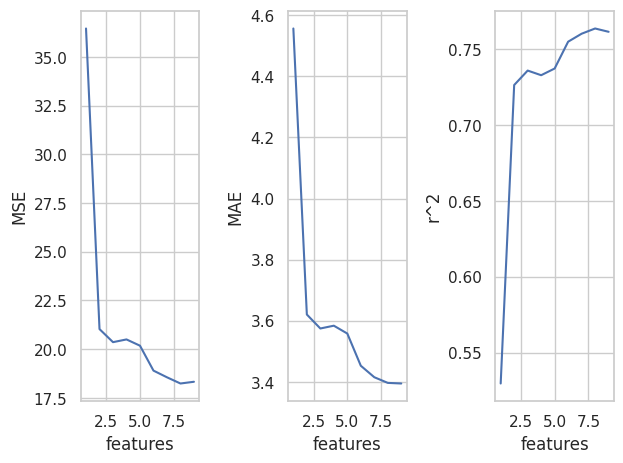

Número óptimo de características (MSE): 8
Número óptimo de características (MAE): 9
Número óptimo de características (R^2): 8


In [ ]:
# Find optimal number of features using cross-validation
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
  print('---- n features =', n_feat)
  mse_cv = []
  mae_cv = []
  r2_cv = []
  kf = KFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    regr_cv = linear_model.LinearRegression()
    fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    regr_cv.fit(x_train, y_train)
    # Test phase
    x_test = fselection_cv.transform(x[test_index, :])
    y_test = y[test_index]
    y_pred = regr_cv.predict(x_test)
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)
  mse = np.average(mse_cv)
  mse_nfeat.append(mse)
  mae = np.average(mae_cv)
  mae_nfeat.append(mae)
  r2 = np.average(r2_cv)
  r2_nfeat.append(r2)
  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("features")
axs[0].set_ylabel("MSE")
axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("features")
axs[1].set_ylabel("MAE")
axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("features")
axs[2].set_ylabel("r^2")
plt.show()

# Encuentra el índice del valor mínimo de MSE y MAE, y el índice del valor máximo de R^2
optimal_mse_index = np.argmin(mse_nfeat)
optimal_mae_index = np.argmin(mae_nfeat)
optimal_r2_index = np.argmax(r2_nfeat)

# Obtiene el número óptimo de características para cada métrica
optimal_n_feat_mse = n_feats[optimal_mse_index]
optimal_n_feat_mae = n_feats[optimal_mae_index]
optimal_n_feat_r2 = n_feats[optimal_r2_index]

# Imprime los resultados
print("Número óptimo de características (MSE):", optimal_n_feat_mse)
print("Número óptimo de características (MAE):", optimal_n_feat_mae)
print("Número óptimo de características (R^2):", optimal_n_feat_r2)

5. Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.

In [ ]:
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mse_scores = []
mae_scores = []
r2_scores = []

for n_feat in n_feats:
    knn = KNeighborsRegressor(n_neighbors=5)
    x_selected = SelectKBest(k=n_feat).fit_transform(x, y)
    mse_cv = -cross_val_score(knn, x_selected, y, scoring='neg_mean_squared_error', cv=5)
    mae_cv = -cross_val_score(knn, x_selected, y, scoring='neg_mean_absolute_error', cv=5)
    r2_cv = cross_val_score(knn, x_selected, y, scoring='r2', cv=5)
    mse_scores.append(np.mean(mse_cv))
    mae_scores.append(np.mean(mae_cv))
    r2_scores.append(np.mean(r2_cv))

# Encuentra el número óptimo de características
optimal_n_feat_mse = n_feats[np.argmin(mse_scores)]
optimal_n_feat_mae = n_feats[np.argmin(mae_scores)]
optimal_n_feat_r2 = n_feats[np.argmax(r2_scores)]

# Imprime los resultados
print("Número óptimo de características (MSE):", optimal_n_feat_mse)
print("Número óptimo de características (MAE):", optimal_n_feat_mae)
print("Número óptimo de características (R^2):", optimal_n_feat_r2)

Número óptimo de características (MSE): 2
Número óptimo de características (MAE): 2
Número óptimo de características (R^2): 2


6. Agregue la variables "Status" (segunda columna) como variable predictora, y utiliza un árbol de decisión para generar un modelo de regresión para la varible Life expectancy". Evalúa este modelo con validación cruzada utilizando la métrica adecuada.

In [ ]:
# Añadir Status como variable predictora

status_df = df_life_exp[['infant deaths', 'Status', 'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Schooling']]
status_df.head()

,infant deaths,Status,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,62,Developing,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,64,Developing,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,66,Developing,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,69,Developing,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,71,Developing,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5


In [ ]:
# Convertir a variables dummies
status_df = pd.get_dummies(df_life_exp, columns = ['Status'], prefix = 'status')

In [ ]:
status = status_df.to_numpy()

In [ ]:
# Generar el árbol de desición
decision_tree = tree.DecisionTreeRegressor()
decision_tree.fit(x, y)

DecisionTreeRegressor()

In [ ]:
# Monte Carlo
monte_carlo = ShuffleSplit(n_splits=100)
r2_d = []
mse_d = []
mae_d = []

# Dividir los datos en N particiones

for train_index, test_index in monte_carlo.split(status):
  x_train = x[train_index,:]
  y_train = y[train_index]

  decision_tree.fit(x_train, y_train)

  #Probar el método
  x_test = x[test_index,:]
  y_test = y[test_index]

  y_pred2 = decision_tree.predict(x_test)

  #Calcular R2, MSE, MAE

  r2_i = r2_score(y_test, y_pred2)
  r2_d.append(r2_i)
  mse_i = mean_squared_error(y_test, y_pred2)
  mse_d.append(mse_i)
  mae_i = mean_absolute_error(y_test, y_pred2)
  mae_d.append(mae_i)
  print('MSE:', mse, ' MAE:', mae,' R^2:', r2)


MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247
MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.761319395

Text(0, 0.5, 'Frecuencia')

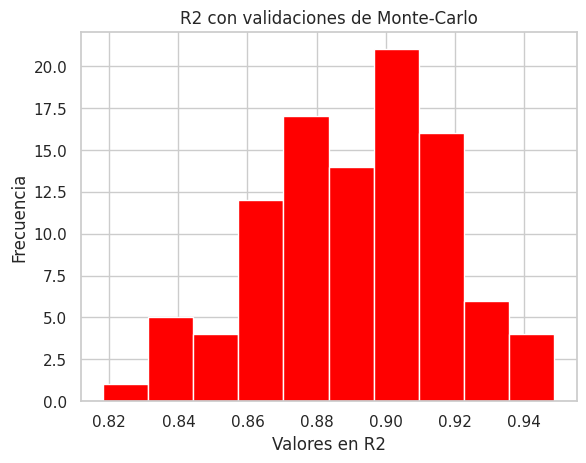

In [ ]:
# Graficar los datos
plt.hist(r2_d, color = 'red')
plt.title('R2 con validaciones de Monte-Carlo')
plt.xlabel('Valores en R2')
plt.ylabel('Frecuencia')

7. Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos:

A. Consideras que el modelo de regresión lineal es adecuado para los datos.

MSE: 63.09945828860143  MAE: 6.2996779905178375  R^2: 0.16112469345873454

Los valores de error absoluto y el cuadrático salen bastante differentes. Por ende, el modelo de regresión lineal no es el más adecuado, por la gran differencia entre los errores.

B. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?

Modelo de vaidación cruzada, más en específico el método Wrapper. Los datos son los siguientes: MSE: 17.448210775398863  MAE: 3.313501433618602  R^2: 0.7730030394301. Podemos ver que el los errores absolutos y cuadráticos disminuyeron considerablemente. De los métodos implementados considero que éste es el más funcional.

C. Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes?

Pues el error cuadrático (MSE), porque de todas las características es el más cambiante. A través de todos los métodos implementados éste era el más variable, cambiando desde valores altos a pequeños inclusive dentro de mismo método. El valor mínimo que alcanzo a tener fue con el método Wrapper con un valor de 3.2124014...

D. ¿El modelo de regresión no lineal funcionó mejor que el lineal?

Si, nuevamente el modeo de regresión lineal resultó ser más ineficcient que el no-lineal. Los errores cuadráto y absoluto son mucho más considerables en el modelo lineal. Sin mencionar que considrando la R¨2 es muy bajo para el modelo no lineal.

E. ¿Notas alguna mejora con el árbol de decisión al agregar la variable categórica "Status"?

El numero de featuresnecearios para el método disminuye drásticamente. Desde 8 o 9 en modeos anteriores a un 2. Más a profundiad los valores de los errores (MSE: 18.32076946376033  MAE: 3.394304784933472  R^2: 0.7613193954032247) también mejoró considerablemente, resultando en ser un modelo más óptimo.

F. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión?

Pues el hecho de que el método de regresión lineal resultó ser el menos efectivo. Al implementar diferentes métodos como K-vecinos y árbol de desición los datos arecen tener mejor rendimiento y los resultados son más prometedores.

In [ ]:
!apt-get install -y texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Prob_Regresión.ipynb' --output-dir='/content/drive/MyDrive/Colab Notebooks'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Prob_Regresión.ipynb to pdf
[NbConvertApp] Support files will be in Prob_Regresión_files/
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Making directory ./Prob_Regresión_files
[NbConvertApp] Writing 151268 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF su